In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the two separate csv files, one csv consists of Fake news and other True news

df1=pd.read_csv("Fake.csv")
df2=pd.read_csv("True.csv")

In [3]:
#Deleting the unnamed column

df1=df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
df2=df2.loc[:, ~df2.columns.str.contains('^Unnamed')]

In [4]:
#Assigning a new column- "label" to identify fake news

df1['label'] = pd.Series(0, index=df1.index)
df2['label'] = pd.Series(1, index=df2.index)

In [5]:
#Resetting the index before concatenation 

df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

In [6]:
#Concatenating the two datasets

df=pd.concat([df1,df2])


In [7]:
df.reset_index(drop=True, inplace=True)
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44919 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44919 non-null  object
 1   text     44919 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44919 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [9]:
df.describe()

,label
count,44919.000000
mean,0.476792
std,0.499467
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [10]:
df.shape

(44919, 5)

In [11]:
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [12]:
#As the title, subject and date column will not going to be helpful in identification of the news.
#So, we can drop these column.
df=df.drop(["title", "subject","date"], axis = 1)

In [13]:
df.isnull().sum()

text     0
label    0
dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

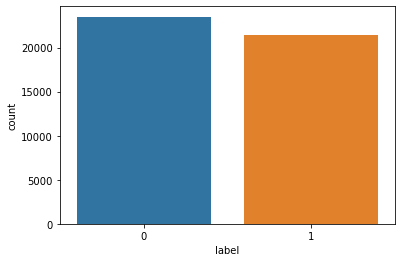

In [14]:
#explore the unique values in the each category
sns.countplot(data=df,x='label',order=df['label'].value_counts().index)

In [15]:
#First, we'll clear the text of any unnecessary spaces, punctuation, and stopwords. 
#The NLTK Library is necessary for that, and some of its modules must be downloaded.

from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
#The function name preprocess text can be created once we have all the necessary modules.
#All of the input data will be preprocessed by this function.

def preprocess_text(text_data):
    preprocessed_text = []
      
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))
  
    return preprocessed_text

In [17]:
#need to deploy the function throughout all of the text column's news


preprocessed_review=preprocess_text(df['text'].values)


100%|██████████| 44919/44919 [3:58:24<00:00,  3.14it/s]      


In [18]:
df['text']=preprocessed_review

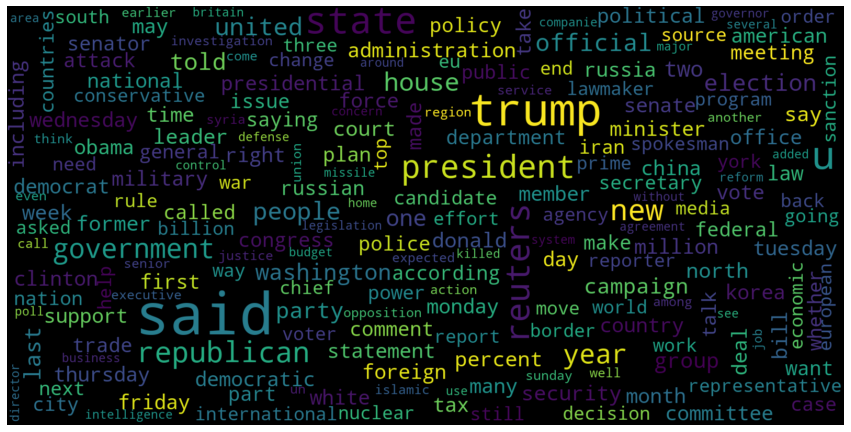

In [19]:
#Let's visualise a separate WordCloud for fake and true news.

# Visualising word which make up Real news

consolidated=' '.join(word for word in df['text'][df['label'] == 1].astype(str))

wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110,collocations=False)

plt.figure(figsize=(15, 10))

plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')

plt.axis('off')

plt.show()

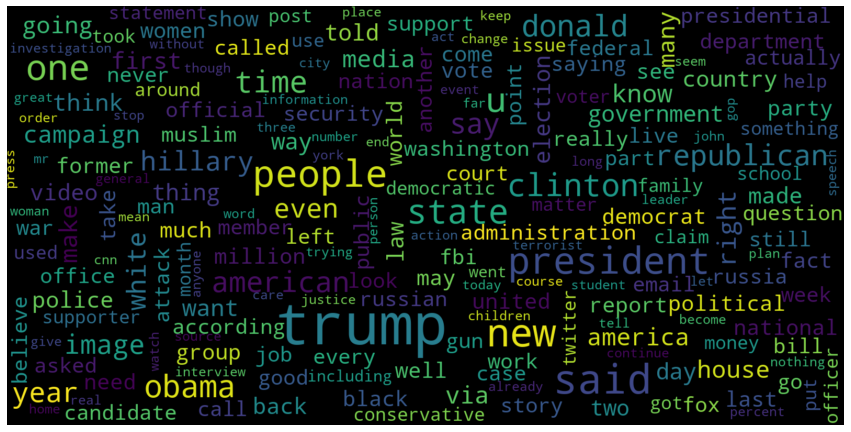

In [20]:
# # Visualising word which make up Fake news
consolidated=' '.join(word for word in df['text'][df['label'] == 0].astype(str))

wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110,collocations=False)

plt.figure(figsize=(15, 10))

plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')

plt.axis('off')

plt.show()

<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

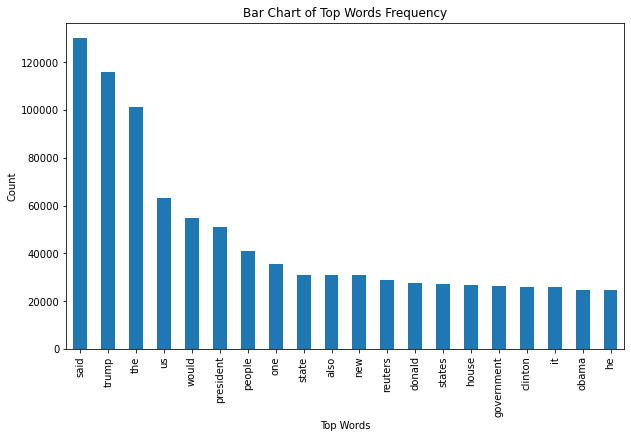

In [21]:
#Plotting the bargraph of the top 20 most frequent words.
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]
  
common_words = get_top_n_words(df['text'], 20)
df3=pd.DataFrame(common_words, columns=['Review', 'count'])
  
df3.groupby('Review').sum()['count'].sort_values(ascending=False).plot(kind='bar',figsize=(10, 6),xlabel="Top Words",ylabel="Count",title="Bar Chart of Top Words Frequency")



In [22]:
#Splitting the target and label 

X=df[['text']]
Y=df[['label']]

In [23]:
#convert the feature into vectors using TfidfVectorizer.

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec=TfidfVectorizer(max_features = 10000, stop_words='english')
features=tf_vec.fit_transform(df['text'])
X_vec=features

In [24]:
#importing modules for model development

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score,ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [25]:
lr=LogisticRegression()
rf=RandomForestClassifier()
kn=KNeighborsClassifier(n_neighbors=3)
dt=DecisionTreeClassifier(criterion='entropy')
pa=PassiveAggressiveClassifier()

lst=[lr,rf,dt,kn,pa]

In [28]:
#Creating loop to analyse the accuracy score of models for different value of random state for Test-size 0.20

for i1 in lst:
    for i2 in range(0,3):
        x_train,x_test,y_train,y_test=train_test_split(X_vec,Y,random_state=i2,test_size=0.20)
        i1.fit(x_train,y_train)
        pred_test=i1.predict(x_test)
        pred_train=i1.predict(x_train)
        print("Model",i1,"Random State-",i2,"Accuracy Score-Test",round(accuracy_score(y_test,pred_test),2),"Accuracy Score-Train",round(accuracy_score(y_train,pred_train),2),"F1 score-train",round(f1_score(y_train,pred_train),2),"F1 score -test",round(f1_score(y_test,pred_test),2))

Model LogisticRegression() Random State- 0 Accuracy Score-Test 0.99 Accuracy Score-Train 0.99 F1 score-train 0.99 F1 score -test 0.99
Model LogisticRegression() Random State- 1 Accuracy Score-Test 0.99 Accuracy Score-Train 0.99 F1 score-train 0.99 F1 score -test 0.99
Model LogisticRegression() Random State- 2 Accuracy Score-Test 0.99 Accuracy Score-Train 0.99 F1 score-train 0.99 F1 score -test 0.99
Model RandomForestClassifier() Random State- 0 Accuracy Score-Test 1.0 Accuracy Score-Train 1.0 F1 score-train 1.0 F1 score -test 1.0
Model RandomForestClassifier() Random State- 1 Accuracy Score-Test 1.0 Accuracy Score-Train 1.0 F1 score-train 1.0 F1 score -test 1.0
Model RandomForestClassifier() Random State- 2 Accuracy Score-Test 1.0 Accuracy Score-Train 1.0 F1 score-train 1.0 F1 score -test 1.0
Model DecisionTreeClassifier(criterion='entropy') Random State- 0 Accuracy Score-Test 0.99 Accuracy Score-Train 1.0 F1 score-train 1.0 F1 score -test 0.99
Model DecisionTreeClassifier(criterion='e

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X_vec,Y,random_state=2,test_size=0.20)

# Logistic Regression

In [30]:
model1=LogisticRegression()
model1.fit(x_train, y_train)
  
# testing the model
print(accuracy_score(y_train, model1.predict(x_train)))
print(accuracy_score(y_test, model1.predict(x_test)))

0.9928203701127035
0.9890917186108638


In [31]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(model1,X_vec,Y,scoring='accuracy', cv=cv)

In [32]:
print(round(cv1.mean(),2)*100)

99.0


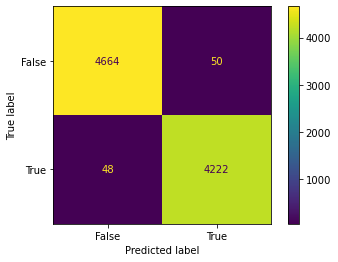

In [33]:
# Confusion matrix of Logistic Regression model


cm=confusion_matrix(y_test, model1.predict(x_test))
  
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False, True])
  
cm_display.plot()
plt.show()

# Decision Tree Classifier

In [34]:
model2=DecisionTreeClassifier()
model2.fit(x_train, y_train)
  
# testing the model
print(accuracy_score(y_train, model2.predict(x_train)))
print(accuracy_score(y_test, model2.predict(x_test)))

0.999972171977181
0.9965494211932324


In [35]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(model2,X_vec,Y,scoring='accuracy', cv=cv)

In [36]:
print(round(cv1.mean(),2)*100)

100.0


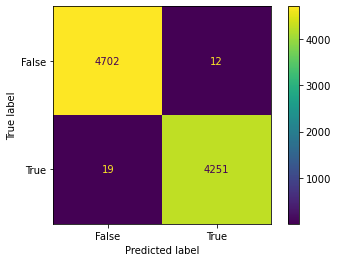

In [37]:
# Confusion matrix of Decision Tree model

cm=confusion_matrix(y_test, model2.predict(x_test))
  
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False, True])
  
cm_display.plot()
plt.show()

# Random Forest 

In [38]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)
  
# testing the model
print(accuracy_score(y_train, model3.predict(x_train)))
print(accuracy_score(y_test, model3.predict(x_test)))

0.999972171977181
0.9972172751558326


In [39]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(model3,X_vec,Y,scoring='accuracy', cv=cv)

In [40]:
print(round(cv1.mean(),2)*100)

100.0


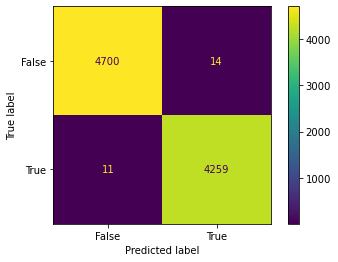

In [41]:
# Confusion matrix of Random Forest model

cm=confusion_matrix(y_test, model3.predict(x_test))
  
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False, True])
  
cm_display.plot()
plt.show()

# Passive Aggressive Classifier

In [42]:
model4=PassiveAggressiveClassifier()
model4.fit(x_train,y_train)
  
# testing the model
print(accuracy_score(y_train, model4.predict(x_train)))
print(accuracy_score(y_test, model4.predict(x_test)))

0.999972171977181
0.9959928762243989


In [43]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(model4,X_vec,Y,scoring='accuracy', cv=cv)

In [44]:
print(round(cv1.mean(),2)*100)

100.0


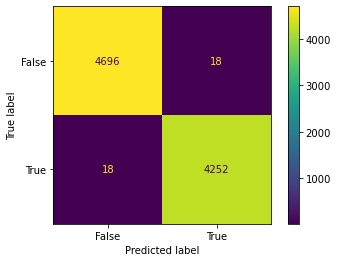

In [45]:
# Confusion matrix of Random Forest model

cm=confusion_matrix(y_test, model4.predict(x_test))
  
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False, True])
  
cm_display.plot()
plt.show()

From the above results, the Random Forest Model is an efficient model with False Negative 11 and True Negative 4259 which is efficient compared to the other models, hence random forest model is considered for Hyperparameter tuning.

# Hyperparameter Tuning

In [101]:
rf=RandomForestClassifier()

In [102]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [103]:
param_dist={"criterion": ["gini", "entropy","log_loss"],'ccp_alpha': [0.0,0.1,0.2,0,3]}

In [104]:
samples=7  # number of random samples 
randomCV=RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=samples,cv=3)

In [105]:
randomCV.fit(x_train,y_train)
  
# testing the model
print(accuracy_score(y_train, randomCV.predict(x_train)))
print(accuracy_score(y_test, randomCV.predict(x_test)))

0.999972171977181
0.9976625111308994


In [106]:
randomCV.best_params_

{'criterion': 'gini', 'ccp_alpha': 0}

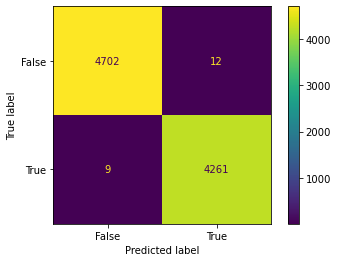

In [107]:
# Confusion matrix of Random Forest model

cm=confusion_matrix(y_test,randomCV.predict(x_test))
  
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False, True])
  
cm_display.plot()
plt.show()

After hyperparameter tuning the False Negative has reduced from 11 to 9 and False Positive has reduced from 14 to 12 and both True Positive and True Negative have improved.

# Saving the model

In [108]:
import pickle
pickle.dump(randomCV, open('Fake_News_Model', 'wb'))

In [109]:
pickled_model=pickle.load(open('Fake_News_Model', 'rb'))
pickled_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)